In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import torch
from lab_one import GaussianMixture, EulerMaruyamaSimulator
from lab_one import Gaussian
from langevin import LangevinSDE, graph_dynamics, animate_dynamics

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  0%|          | 0/999 [00:00<?, ?it/s]

100%|██████████| 999/999 [00:00<00:00, 1496.73it/s]


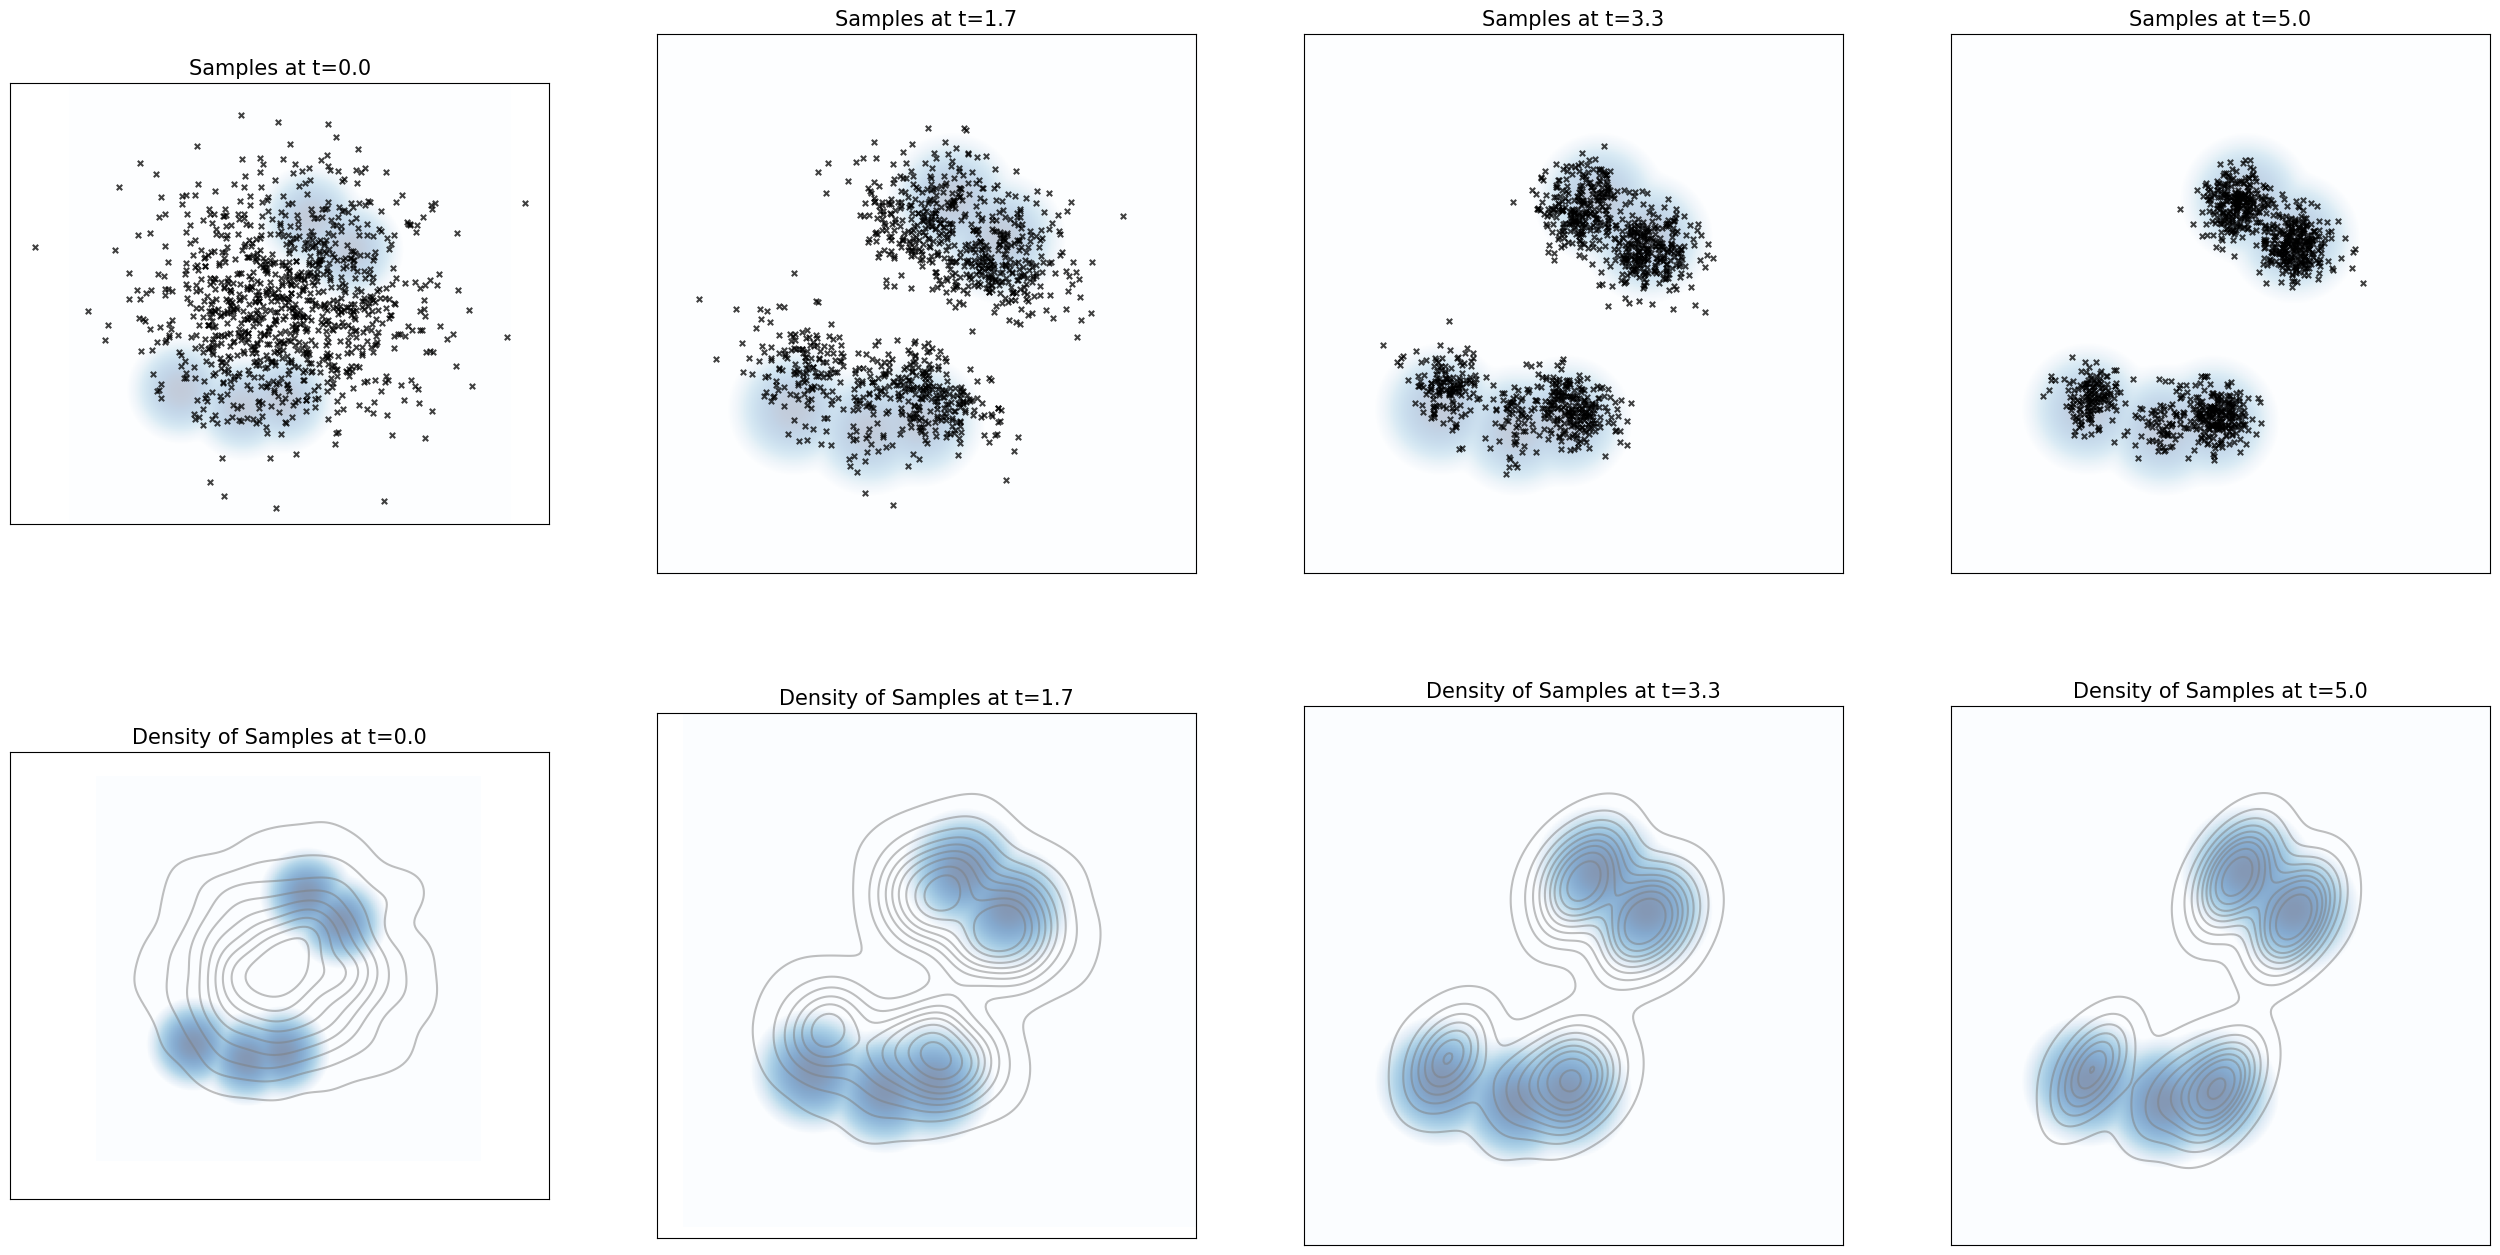

In [13]:
# Construct the simulator
target = GaussianMixture.random_2D(nmodes=5, std=0.75, scale=15.0, seed=3.0).to(device)
sde = LangevinSDE(sigma=10.0, density=target)
simulator = EulerMaruyamaSimulator(sde)

# Graph the results!
graph_dynamics(
    num_samples=1000,
    source_distribution=Gaussian(mean=torch.zeros(2), cov=20 * torch.eye(2)).to(device),
    simulator=simulator,
    density=target,
    timesteps=torch.linspace(0, 5.0, 1000).to(device),
    plot_every=334,
    bins=200,
    scale=15
)


100%|██████████| 999/999 [00:00<00:00, 1428.68it/s]
MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

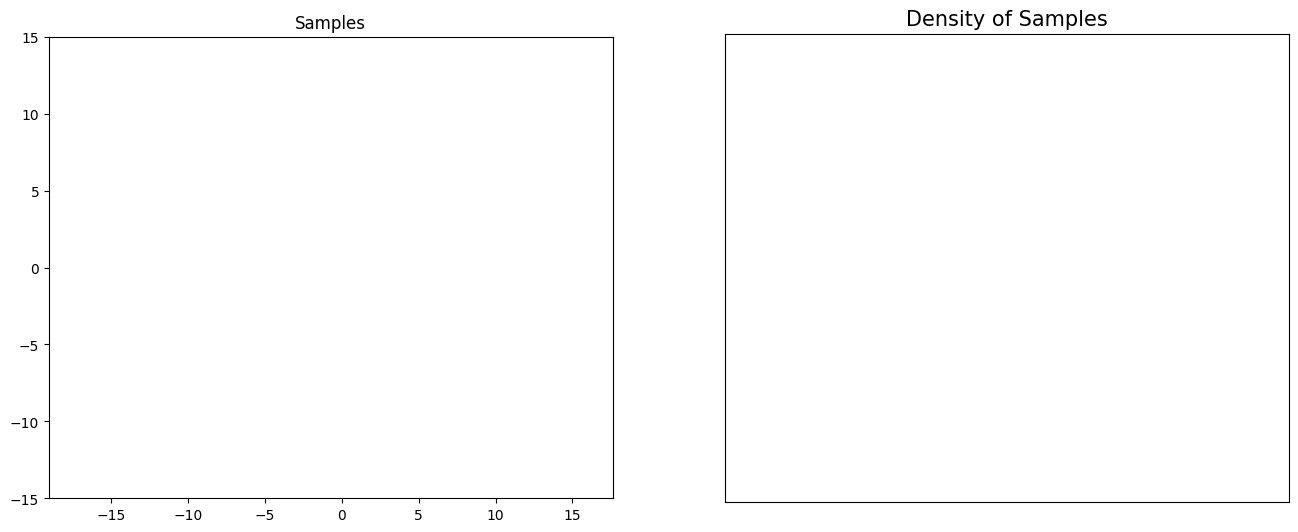

In [ ]:
# OPTIONAL CELL
# Construct the simulator
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
target = GaussianMixture.random_2D(nmodes=5, std=0.75, scale=15.0, seed=3.0).to(device)
sde = LangevinSDE(sigma=10.0, density=target)
simulator = EulerMaruyamaSimulator(sde)

# Graph the results!
animate_dynamics(
    num_samples=1000,
    source_distribution=Gaussian(mean=torch.zeros(2), cov=20 * torch.eye(2)).to(device),
    simulator=simulator,
    density=target,
    timesteps=torch.linspace(0, 1.5, 1000).to(device),
    bins=200,
    scale=15,
    animate_every=100
)
